### Лінійна апроксимація

In [49]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import log

In [31]:
sns.set_style("whitegrid")
#sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (10,10)

In [32]:
x = np.array([1.2, 1.4, 1.6, 1.8, 2., 2.2, 2.4, 2.6])
y = np.array([2.325, 2.515, 2.638, 2.700, 2.696, 2.626, 2.491, 2.291])
df_y = pd.DataFrame(y)
x_new = sm.add_constant(x)
df_x = pd.DataFrame(x_new)
#print(x)
#df_x.head()

,0,1
0,1.0,1.2
1,1.0,1.4
2,1.0,1.6
3,1.0,1.8
4,1.0,2.0


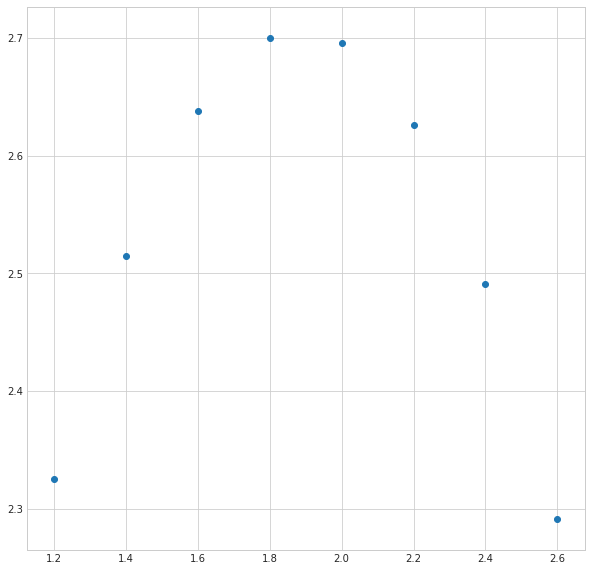

In [33]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.scatter(x, y)
plt.show()

In [36]:
my_model = sm.OLS(df_y, df_x)
results = my_model.fit()
print('Коефіцієнти моделі \n {}'.format(results.params))

Коефіцієнти моделі 
 0    2.580262
1   -0.023690
dtype: float64


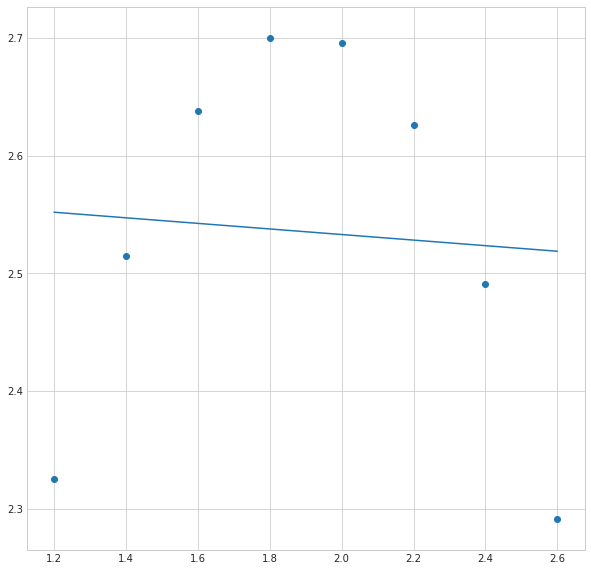

In [39]:
line = lambda x: results.params[0] + x * results.params[1]

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.scatter(x, y)
ax.plot(x, line(x))
plt.show()

### Квадратична апроксимація

In [42]:
df_x['2'] = df_x[1] ** 2
df_x.head()

,0,1,2
0,1.0,1.2,1.44
1,1.0,1.4,1.96
2,1.0,1.6,2.56
3,1.0,1.8,3.24
4,1.0,2.0,4.00


In [43]:
sq_model = sm.OLS(df_y, df_x)
res_sq = sq_model.fit()

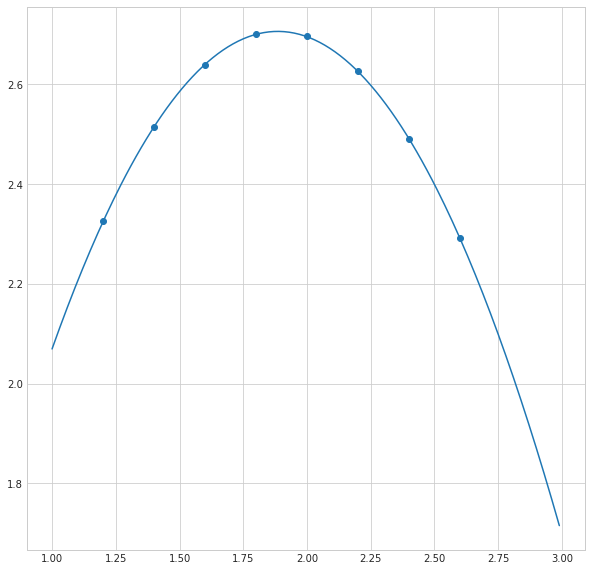

In [48]:
parab = lambda x: res_sq.params[0] + res_sq.params[1] * x + res_sq.params[2] * (x ** 2)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
points_x = np.arange(1, 3, 0.01)
ax.scatter(x, y)
ax.plot(points_x, parab(points_x))
plt.show()

### Апроксимація логарифмічною функцією

In [51]:
df_x['3'] = df_x[1].apply(log)

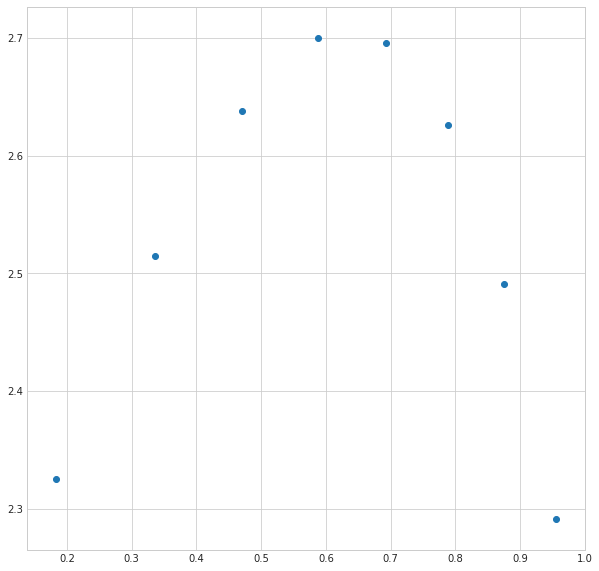

In [52]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.scatter(df_x['3'], df_y)
plt.show()

In [53]:
ln_model = sm.OLS(df_y, df_x[[0, '3']])
res_ln = ln_model.fit()

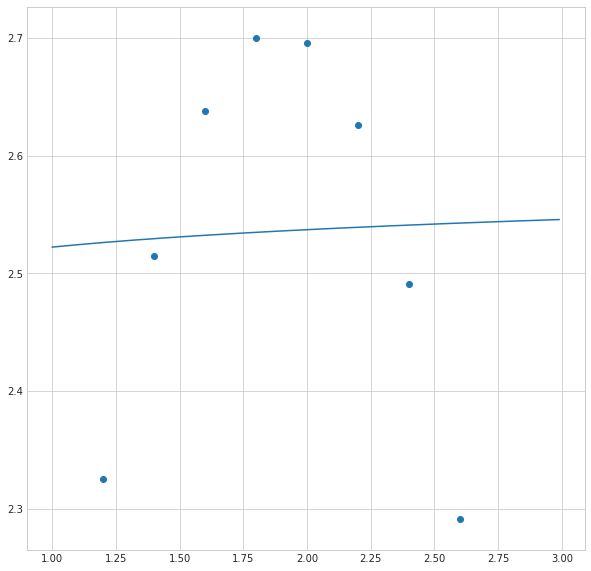

In [58]:
log_line = lambda x: res_ln.params[0] + res_ln.params[1] * log(x)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
points_x = np.arange(1, 3, 0.01)
ax.scatter(x, y)
ax.plot(points_x, [log_line(point) for point in points_x])
plt.show()